<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/notebooks/05_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Integració numèrica

**Objectiu:** Evaluar integrals

$$ \int^b_a f(x) dx$$

Moltes integrals definides no tenen sol·lució

$$ 
   \int^b_a \sqrt{1 + \cos^2 x} dx
$$

### Fonaments de la quadratura

Volem obtenir l'integral $I$ a partir d'una aproximació $I_N$ tal que

$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$

on les $x_i$ són els *punts de quadratura* o *nodes* i els "w_i" són els *pesos*. Normalment una determinada regla de quadratura especifica els punts $x_i$ i el conjunt de pesos $w_i$.

La convergència requereix:

$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

## Sumes Riemannes

Donada $f(x)$ i una partició de l'interval $[a,b]$ en $\{x_i\}^N_{i=0}$ i $a = x_0 < x_1 < \ldots < x_N = b$ i $x^*_i \in [x_i, x_{i+1}]$ definim els sumatori de Riemann com:

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

Aquesta és una definició general que porta a diferents tècniques de quadratura basades en com escollim $x_i^* \in [x_i, x_{i+1}]$.

### Regla del punt mig

Escollim $x_i^*$ tal que

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

de manera que

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_N[f]$$

sobre $\Delta x_i = x_{i+1} - x_i$ 

#### Exercici: Integrar amb la regla del punt mig

Calcula l'integral 

$$
  \int^{2\pi}_0 sin(x)dx
$$

A partir del mètode de sumes de Riemann. Compara el resultat numèric amb l'analític:

$$
    \int^x_0 sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

In [0]:
# Escriu un codi per fer sumes de Rieman i calcular int(sin(x)) per x [0,2pi]


In [0]:
#@title
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_star.shape)
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_star + delta_x / 2.0, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

print("Numerical integration : {}".format(I_hat[-1]))
print("Analytical integration : {}".format(0))
print("Error : {}".format(abs(I_hat[-1])))


plt.show()

### Quadratura Newton-Cotes

A partir d'$N+1$ punts, evaluar $f(x)$ en aquests punts i integrar exactament el polinomi interpolador:

$$I_N[f] = \int^b_a P_N(x) dx$$

#### Mètode trapezial


A partir de polinomis d'ordre 1 entre cada punt (i.e. polinomis lineals definits a trossos).  Els coeficients dels polinomis per cada interval són:

$$p_0 = f(x_i) \quad \quad p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

S'obté el polinomi interpolador:

$$p_1(x) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} ( x- x_i) + f(x_i)$$

Integrant aquest polinomi tenim:

$$\begin{aligned}
    \int^{x_{i+1}}_{x_i} (p_0 + p_1 (x - x_i)) dx &= \left . p_0 x + p_1 \left (\frac{x^2}{2} - x_i x\right) \right |^{x_{i+1}}_{x_i} \\
    &= p_0 \Delta x + p_1 \left (\frac{1}{2} (x_{i+1} + x_i) \Delta x - x_i \Delta x\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i))\left (\frac{1}{2} (x_{i+1} + x_i) - x_i\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i)) \frac{\Delta x}{2} \\
    & = \frac{\Delta x}{2} (f(x_{i+1}) + f(x_i))
\end{aligned}$$

Podem simplificar la suma si notem que tots els termes excepte els punts dels extrems tenen una contribució total de $\Delta x$ a la suma total tal que:

$$
    I_N[f] = \frac{\Delta x}{2} (f(x_0) + f(x_N) ) + \sum^{N-1}_{j=1} \Delta x f(x_j)
$$


#### Exercici: Integrar amb el mètode trapezial

Calcula l'integral 

$$
  \int^{2\pi}_0 sin(x)dx
$$

A partir del mètode trapezial. Compara el resultat numèric amb l'analític:

$$
    \int^x_0 sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

In [0]:
# Escriu el codi

In [0]:
#@title
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

print("Error : {}".format(abs(I_hat[-1])))

plt.show()

#### Regla de Simpson

La regla de Simpson utilitza polinomis de segon ordre entre cada punt (i.e. polinomis quadràtics definits a trossos).

Els polinomis tenen la forma

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_i + \frac{\Delta x}{2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

La integral d'aquest polinomi dóna

$$
    \int^{x_{i+1}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_i + \frac{\Delta x}{2} \right ) + \frac{\Delta x}{6} f(x_{i+1})
$$

#### Exercici: Integrar amb la regla de Simpson

Calcula l'integral 

$$
  \int^{2\pi}_0 sin(x)dx
$$

A partir de la regla de Simpson. Compara el resultat numèric amb l'analític:

$$
    \int^x_0 sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

In [0]:
# Escriu el codi aquí


In [0]:
#@title
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

print("Error : {}".format(abs(I_hat[-1])))

plt.show()

## Integració MonteCarlo

Els mètodes de Monte Carlo són tècniques heurístiques àmpliament utilitzades que poden resoldre diversos problemes comuns, incloent problemes d’optimització i d’integració numèrica. Aquests algorismes funcionen mitjançant la generació de nombres aleatòris d'una distribució per simular el funcionament d'un sistema. Les aplicacions van des de la resolució de problemes de física teòrica fins a la predicció de tendències en inversions financeres.

La idea bàsica es basa en l'identitat següent:

$$
\bar{f} = \frac{1}{b-a}\int_a^b f(x)dx
$$

Veiem que podem trobar la mitja d'una funció a partir de la seva integral. De la mateixa manera, podem trobar l'integral a partir de la mitja de la funció!

### Mètode MC directe

Considerem la següent integral

$$
I = \int_0^{5} \frac{e^{-x}}{1+(x-1)^2}dx
$$

L'implementació del mètode directe seria:

1. Generar $x \sim U(0,5)$
2. Avaluar $f(x)$
3. Repetir $N$ vegades els passos 1 i 2
4. Calcular l'integral a partir de $5 \cdot \bar{f}$

Per generar N nombres uniformement distribuits entre a i b pots fer servir:

```
numpy.random.uniform(a,b,N)
```

Recorda que pots fer la potència n d'un array x amb la funció:

```
numpy.power(x,n)
```

I l'exponencial amb:

```
numpy.exp(x)
```



#### Exercici: Calcula l'integral a partir del mètode MC directe amb N = 10000

In [0]:
#Escriu un codi que calcula l'integral anterior a partir del mètode MC directe
#Recorda que pots generar N nombres que segueixen una distribució U(a,b) amb
# numpy.random.uniform(a,b,N)

In [0]:
#@title
def function(x):
  return numpy.exp(-x)/(1 + numpy.power(x-1,2))


N = 10000
a = 0
b = 5

x = numpy.random.uniform(a,b,N)
y = function(x)

print("MC direct = {} +/- {}".format((b-a)*numpy.mean(y),numpy.std((b-a)*y)))
print("Scipy = {}".format(integrate.quad(function,a,b)[0]))



Veiem que obtenim un bon resultat. Què passa si volem reduir l'error? Podríem incrementar $N$ però això implicaria augmentar el temps de computació...

### Mètode MC per àrees

Un altre mètode Monte Carlo per calcular una integral es basa en la següent reflexió. Si llançem aleatòriament puntx (x,y) a la gràfica de la funció que volem integrar, el nombre de punts que cauen sota la corba $N_V$ és proporcional a l'àrea $I$. Per tant, si generem $N_T$ punts sobre una àrea $A_T$ que conté $I$, obtenim la següent relació:

$$
I = A_T \frac{N_V}{N_T}
$$



#### Exercici: Calcula l'integral a partir del mètode MC per àrees

Pasos:

1. Primer s'ha de trobar l'àrea $A_T$. Per tant s'ha de dibuixar $f(x)$ en l'interval que volem integrar i trobar el màxim de la funció. Recordeu que podeu trobar el mínim i el màxim d'un array amb:

```
numpy.amin(x)
numpy.amax(x)
```

2. Un cop tenim el rectangle d'area $A_T$ definit per $(a,b),(y_min,y_max)$, generem N x,y uniformement distribuits sota aquests intervals.

3. Ara nomes hem de comptar quins x,y cauen per sota de la funció i trobar la integral mitjançant l'expressió anterior

In [0]:
#Escriu un codi que calcula l'integral anterior a partir del mètode MC per àrees

In [0]:
#@title
def function(x):
  return numpy.exp(-x)/(1 + numpy.power(x-1,2))

x_plot = numpy.linspace(a,b,1000)
y_min = numpy.amin(function(x_plot))
y_max = numpy.amax(function(x_plot))

N = 1000

x_tries = numpy.random.uniform(a,b,N)
y_tries = numpy.random.uniform(y_min,y_max,N)

x_valid = x_tries[y_tries < function(x_tries)]
y_valid = y_tries[y_tries < function(x_tries)]

x_novalid = x_tries[y_tries > function(x_tries)]
y_novalid = y_tries[y_tries > function(x_tries)]


plt.plot(x_plot,function(x_plot))
plt.plot(x_valid,y_valid,'b.')
plt.plot(x_novalid,y_novalid,'r.')

print("MC area = {} +/- {}".format((b-a)*(y_max-y_min)*len(x_valid)/N,(b-a)*(y_max-y_min)/numpy.sqrt(N)))
print("Scipy = {}".format(integrate.quad(function,a,b)[0]))



## Importance Sampling

Una manera de reduir la variança del mètode MC sense incrementar $N$ consisteix a escollir els valors de $x$ distribuïts d'una manera adequada en comptes d'uniformement.

L'objectiu és trobar una funció $g(x)$ tal que 

$$
\frac{f(x)}{g(x)} \approx k
$$

a més a més, la funció $g(x)$ ha de complir

$$
\int_a^b g(x)dx = 1 \qquad \text{i} \qquad g(x) > 0, \forall x \in [a,b]
$$

Llavors, podrem escriure:

$$
I = \int_a^b f(x) dx = \int_a^b \left[\frac{f(x)}{g(x)}\right] g(x) dx
$$

Si definim

$$
G(x) = \int_a^x g(x) dx \qquad \Rightarrow \qquad dG(x) = g(x)dx
$$

i fem el canvi de variable $r = G(x)$ obtenim:

$$\begin{align*}
I &= \int_a^b \left[\frac{f(x)}{g(x)}\right] g(x) dx \\
&= \int_0^1 \frac{f(G^{-1}(r))}{g(G^{-1}(r))}dr
\end{align*}
$$

que podem aproximar com:

$$
I \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(G^{-1}(r))}{g(G^{-1}(r))}
$$

on $r$ están distribuits uniformement a [0,1]




#### Trobar $g(x)$

Comencem per visualitzar $f(x)$ per poder trobar $g(x)$

In [0]:
def function(x):
  return numpy.exp(-x)/(1 + numpy.power(x-1,2))

x = numpy.linspace(0,6,100)
y = function(x)
plt.plot(x,y)
plt.title("f(x)")

Veiem que la funció és pràcticament cero a partir d'$x=3$. Considerem la funció
$$
g(x) = A e^{-\lambda x}
$$

Per la condició $\int_a^b g(x)dx = 1$ podem trobar

$$
A = \frac{\lambda}{e^{-a\lambda} - e^{-b\lambda}}
$$

Com trobem $\lambda$? Podem provar diferents valors per $\lambda$ i utilitzar aquella que dóna mínima variança.

L'implementació és doncs:

1. Comencem amb $\lambda = 0.05$
2. Calculem la variança i l'integral amb Importance Sampling
3. Incrementem $\lambda $+=$ 0.05$
4. Repetim fins un límit i escollim $\lambda$ amb mínima variança

Podem trobar l'índex del valor mínim d'un array amb la funció:



```
numpy.argmin(x)
```




#### Excercici: Fes Important Sampling per resoldre l'integral anterior amb 

$$
g(x) = A e^{-\lambda x}, \qquad A = \frac{\lambda}{e^{-a\lambda} - e^{-b\lambda}}, \qquad G^{-1}(r) = -\frac{1}{\lambda}\ln\left(\ e^{-\lambda a} - \frac{\lambda r}{A}  \right)
$$

I la integral és aproximada per:

$$
I \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(G^{-1}(r))}{g(G^{-1}(r))}
$$

Recorda que pots fer l'exponencial i el logaritme d'un array x amb les funcions:

```
numpy.exp(x)
numpy.log(x)
```

També pots generar N nombres distribuits uniformement entre 0.0 i 1 amb:

```
numpy.random.random(N)
```



In [0]:
# Escriu el codi per calcular l'integral de [0,5] amb N = 10000
# Fes Important Sampling amb g(x) = A*e^(lambda*x)
# Troba lambda tal que minimitza l'error

In [0]:
#@title
def function(x):
  return numpy.exp(-x)/(1 + numpy.power(x-1,2))

def g(x,l,a,b):
  A = l/(numpy.exp(-a*l)-numpy.exp(-b*l))
  return A*numpy.exp(-l*x)

def g_inverse(r,l,a,b):
  return (-1./l)*numpy.log(numpy.exp(-a*l)-r*(numpy.exp(-a*l)-numpy.exp(-b*l)))

N = 10000
a = 0
b = 5
lambdas = [i*0.05 for i in range(1, 61)]
Integrals = []
variances = []

for l in lambdas:
  r = numpy.random.random(N)
  y = function(g_inverse(r,l,a,b))/g(g_inverse(r,l,a,b),l,a,b)
  Integrals.append(numpy.mean(y))
  variances.append(numpy.std(y))
  

  
optimal_lambda = lambdas[numpy.argmin(numpy.asarray(variances))]
optimal_variance = variances[numpy.argmin(numpy.asarray(variances))]
optimal_Integral = Integrals[numpy.argmin(numpy.asarray(variances))]

print(f"Optimal lambda: {optimal_lambda}")
print(f"Optimal Integral: {optimal_Integral} +/- {optimal_variance}")
print(f"Scipy = {integrate.quad(function,a,b)[0]}")

plt.plot(lambdas,variances)


## Anàlisi dels errors

A partir del que hem vist, un mètode determinat d'integració $I_N$ es pot escriure com:

$$
    I_N[f] = \sum^{N-1}_{i=0} w_i f(x_i).
$$

Definim l'error $E[f]$ tal que

$$I[f] = I_N[f] + E_N[f]$$


### Precisió de la quadratura

Podem utilitzar el nostre anàlisi polinomial d'abans per analitzar l'error de cada mètode. A partir del teorema de Lagrange tenim el terme resta d'abans que podem utilitzar per trobar l'error per interval fent l'integral.

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$


Per trobar l'error total hem de sumar l'error per cada interval:

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_N(x) dx = I_N[f] + E_N[f]$$


#### Error trapezial

Per $N=1$ tenim

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

La integració dóna

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = -\frac{\Delta x^3}{12} f''(c)$$


Si sumem per cada interval l'error total és:

$$E_N[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{N} f''(c_i)$$

o més il·lustratiu

$$E_N[f] = -\frac{1}{2} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

on l'expressió en brackets és la mitjana de la segona derivada sobre l'interval $[a,b]$. Això mostra que el mètode trapezial convergeix quadràticament si $\Delta x \rightarrow 0$.

#### Error del mètode de Simpson

Aquí tenim $N = 2$ 

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

Fent la integració i sumant per trobar l'error obtenim:

$$E_N[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(c)$$

Veiem que hem guanyat dos ordres de magnitud en precisió simplement augmentant l'ordre del polinomi en 1!

##### Exercici:

Per $f(x) = \sin \pi x$ calcula l'error en funció del nombre de punts (i.e. la mida de $\Delta x$)
a l'interval $x\in[0,1]$.

$$\begin{aligned}
    \text{Exact:}  &I[f] = \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Midpoint:}  &I_1[f] = \Delta x f(1/2) = \sin (\pi / 2) = 1 \\
    \text{Trapezoid:}  &I_1[f] = \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson's:}  &I_1[f] = \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$

In [0]:
# Calcula l'error pels diferents mètodes d'integració numèrica.
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = range(50, 1000, 50)

# Per cada N \in num_partitions, omple els següents arrays amb:
delta_x = numpy.empty(len(num_partitions))       # Delta x corresponent a M
error_mid = numpy.empty(len(num_partitions))     # Error amb el mètode del punt mig
error_trap = numpy.empty(len(num_partitions))    # Error amb el mètode trapezial
error_simpson = numpy.empty(len(num_partitions)) # Error amb el mètode de Simpson

# Fes un plot per cada error vs delta_x


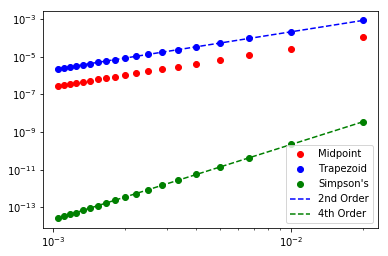

In [12]:
#@title
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_mid = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]

    # Compute Midpoint
    x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
    I_hat = 0.0
    for i in range(0, N):
        I_hat += f(x_star[i]) * delta_x[j]
    error_mid[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(1, N):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - 2.0 / numpy.pi)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error_mid, 'ro', label="Midpoint")
axes.loglog(delta_x, error_trap, 'bo', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'go', label="Simpson's")
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.legend(loc=4)

plt.show()

### Millora recursiva de l'exactitud

Considera que fem el mètode trapezial amb mida $2 \Delta x$, tindrem

$$\begin{aligned}
			\int^{x_2}_{x_0} f(x) dx  &= \frac{2 \Delta x}{2} (f_0 + f_2) =  h (f_0 + f_2) \Rightarrow \\
			\int^b_a f(x)dx &\approx I_{2\Delta x}[f] = \sum^{N/2-1}_{j=0} \Delta x (f_{2j} + f_{2j+2}) \\
			&= \Delta x (f_{0} + f_{2})  + \Delta x (f_{2} + f_{4})  + \cdots + \Delta x (f_{N-2} + f_{N}) \\
			&= \Delta x\left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )
  \end{aligned}
$$

Compara els dos mètodes per $\Delta x$ i $2 \Delta x$:

$$I_{\Delta x}[f] = \frac{\Delta x}{2} \left (f_0 + f_N + 2 \sum^{N-1}_{j=1} f_j \right)~~~~~~~~~ I_{2 \Delta x}[f] = \Delta x \left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )$$

$$I_{\Delta x}[f] = \frac{1}{2} I_{2\Delta x} + \Delta x(f_1 + f_3 + \cdots + f_{N-1})$$

Veiem que podem reutilitzar el que hem fet per calcular $Q_{2 \Delta x}[f]$ per redefinir l'integral.

### Intervals arbitraris (Transformacions afins)

Mapejar $\xi \in [-1,1] \rightarrow x \in [a,b]$ es pot fer mitjançant una *transformació afí* que és una transformació linear.

$$x = \underbrace{\frac{b - a}{2}}_{\text{scaling}} \xi + \underbrace{\frac{a+b}{2}}_{\text{translation}} ~~~~~ \text{o} ~~~~~ \xi = \left( x - \frac{a + b}{2}\right) \frac{2}{b-a}$$

$$\begin{aligned}
    I[f] &= \int^b_a f(x) dx = \int^1_{-1} f(x(\xi)) \frac{dx}{d\xi} d\xi = \frac{b - a}{2} \int^1_{-1} f(x(\xi)) d\xi\\
    I_N[f] &= \sum_i w_i f(x(\xi_i)) \left . \frac{dx}{d\xi}\right|_{\xi_i}
\end{aligned}$$

#### Exemple:  Mètode Newton-Cotes

Podem reescriure les equacions prèvies tal que siguin per l'interval $\xi \in [-1, 1]$ en comptes de $x \in [x_i, x_{i+1}]$. Recordeu que en general un mètode de quadratura es pot escriure com:
$$
    \sum^N_{i=1} w_i f(\xi_i)
$$

on "w_i" són els pesos i $\xi_i$ són els punts específics on avaluar la funció. En el cas de Newton-Cotes sabem que els punts $\xi_i$ són uniformement distribuïts en $[-1,1]$ però encara hem de definir els pesos. En el mètode trapezial podem veure que

$$
    \int^1_{-1} f(x) dx \approx f(-1) + f(1)
$$

així doncs $\xi_0 = 1$,$\xi_1 = 1$, i $w_0 = w_1 = 1$. Noteu que si fem un mapeig a partir de la transformació afí obtenim el mètode trapezial original:

$$
    I_N[f] = \sum_i w_i f(x(\xi_i)) \left . \frac{dx}{d\xi}\right|_{\xi_i} = (f(-1) + f(1)) \frac{\Delta x}{2}
$$

Similarment en el mètode de Simpson tenim

$$
    \xi = [-1, 0, 1] \quad \text{and} \quad w = \left[\frac{1}{3}, \frac{4}{3}, \frac{1}{3} \right].
$$

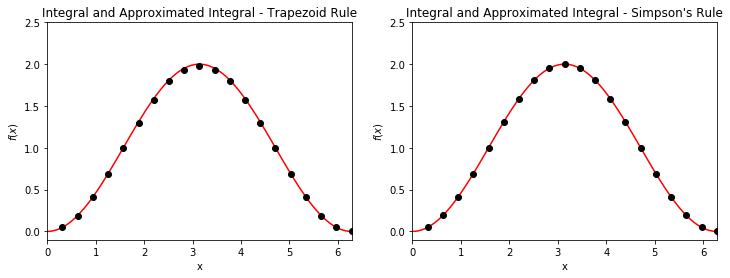

In [13]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

# Trapezoid
xi_map = lambda a, b, x: (b - a) / 2.0 * x + (a + b) / 2.0

# Trapezoid/Simpson's
xi_methods = [[-1, 1], [-1, 0, 1]]
w_methods = [[1, 1], [1/3, 4/3, 1/3]]
titles = ["Trapezoid Rule", "Simpson's Rule"]
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(fig.get_figwidth() * 2)
for k in range(2):
    xi = xi_methods[k]
    w = w_methods[k]
    I_hat = numpy.zeros(x_hat.shape)
    for j in range(len(xi)):
        I_hat[0] += f(xi_map(x_hat[0], x_hat[1], xi[j])) * w[j]
    I_hat[0] *= delta_x / 2.0
    for i in range(1, num_partitions):
        for j in range(len(xi)):
            I_hat[i] += f(xi_map(x_hat[i], x_hat[i+1], xi[j])) * w[j]
        I_hat[i] *= delta_x / 2.0
        I_hat[i] += I_hat[i - 1]


    axes[k].plot(x, I(x), 'r')
    axes[k].plot(x_hat + delta_x, I_hat, 'ko')
    axes[k].set_xlabel("x")
    axes[k].set_ylabel("$f(x)$")
    axes[k].set_title("Integral and Approximated Integral - %s" % titles[k])
    axes[k].set_xlim((0.0, 2.0 * numpy.pi))
    axes[k].set_ylim((-0.1, 2.5))

plt.show()